1. Прочесть grayscale дайкомы пожатые JPEG
2. Прочесть цветные дайкомы
3. Пожать цветные дайкомы с помощью dcmconv
4. Декодировать цветной дайком пожатый с помощью dcmconv с помощью PIL (нужно брать сырое поле PixelData)
5. Сравнить цветные дайкомы пожатые с помощью dcmconv с непожатыми
6. Пожать rgb изображение c помощью PIL


https://pypi.org/project/simplejpeg/

In [26]:
from turbojpeg import TurboJPEG, TJPF_GRAY, TJSAMP_GRAY, TJFLAG_PROGRESSIVE, decode_jpeg_header

ImportError: cannot import name 'decode_jpeg_header' from 'turbojpeg' (/home/anvar/anaconda3/lib/python3.8/site-packages/turbojpeg.py)

In [2]:
from pydicom import dcmread
import matplotlib.pyplot as plt
%matplotlib inline
from pathlib import Path

In [3]:
folder = Path('/home/anvar/work/data/for_jpeg')

# 1,2
- Прочесть grayscale дайкомы пожатые JPEG
- Прочесть цветные дайкомы

In [4]:
dcm_gray = dcmread(folder / '1.2.40.0.13.1.1.1.192.168.200.45.20201012180832325.41805'/ '1.2.840.113619.2.428.3.2831214542.568.1602562897.566.156.dcm')
dcm_rgb = dcmread(folder / '1.2.826.0.1.3680043.2.135.737538.61533215.7.1607388345.750.77' / 'covid' / '1.2.826.0.1.3680043.9.7574.1.55.772.37.616.3.1614346583.426.3.62.dcm')

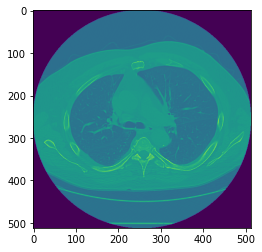

In [5]:
plt.imshow(dcm_gray.pixel_array)

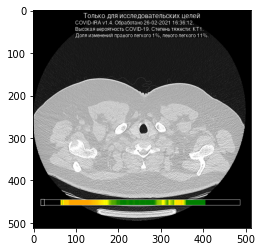

In [6]:
plt.imshow(dcm_rgb.pixel_array)

# 3.
- Пожать цветные дайкомы с помощью dcmconv


In [7]:
!gdcmconv -J --lossy -q 90 -i /home/anvar/work/data/for_jpeg/1.2.826.0.1.3680043.2.135.737538.61533215.7.1607388345.750.77/covid/1.2.826.0.1.3680043.9.7574.1.55.772.37.616.3.1614346583.426.3.62.dcm -o /home/anvar/work/data/for_jpeg/1.2.826.0.1.3680043.2.135.737538.61533215.7.1607388345.750.77/1.2.826.0.1.3680043.9.7574.1.55.772.37.616.3.1614346583.426.3.62_lossy.dcm

You have selected a lossy compression transfer syntax.
This will degrade the quality of your input image, and can.
impact professional interpretation of the image.
Do not use if you do not understand the risk.


In [8]:
dcm_rgb_jpeg = dcmread(folder / '1.2.826.0.1.3680043.2.135.737538.61533215.7.1607388345.750.77' / '1.2.826.0.1.3680043.9.7574.1.55.772.37.616.3.1614346583.426.3.62_jpeg.dcm')

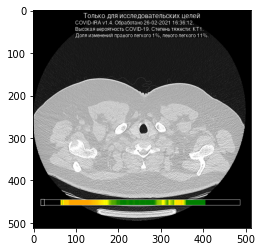

In [9]:
plt.imshow(dcm_rgb_jpeg.pixel_array)

In [10]:
dcm_rgb_jpeg.pixel_array.shape

(512, 512, 3)

# 4. 

Декодировать цветной дайком пожатый с помощью dcmconv с помощью PIL (нужно брать сырое поле PixelData)

In [43]:
from simplejpeg import is_jpeg, decode_jpeg, decode_jpeg_header, encode_jpeg

In [12]:
is_jpeg(dcm_gray.PixelData)

False

In [46]:
encode_jpeg(dcm_gray.PixelData)

ValueError: Buffer has wrong number of dimensions (expected 3, got 1)

In [47]:
dcm_gray.pixel_array

array([[-2000, -2000, -2000, ..., -2000, -2000, -2000],
       [-2000, -2000, -2000, ..., -2000, -2000, -2000],
       [-2000, -2000, -2000, ..., -2000, -2000, -2000],
       ...,
       [-2000, -2000, -2000, ..., -2000, -2000, -2000],
       [-2000, -2000, -2000, ..., -2000, -2000, -2000],
       [-2000, -2000, -2000, ..., -2000, -2000, -2000]], dtype=int16)

In [13]:
is_jpeg(dcm_rgb_jpeg.PixelData)

False

In [14]:

fname = '/home/anvar/work/data/for_jpeg/1.2.40.0.13.1.1.1.192.168.200.45.20201012180832325.41805/1.2.840.113619.2.428.3.2831214542.568.1602562897.566.196.dcm'
dicom = dcmread(fname)

with open(fname, 'rb') as file:
    file_bytes = file.read()

In [15]:
len(file_bytes)

250476

In [16]:
is_jpeg(file_bytes)

False

In [17]:
len(dicom.PixelData)

246426

In [18]:
len(file_bytes[-246426:])

246426

In [19]:
file_bytes[-246426:] == dicom.PixelData

False

In [20]:
len(dicom.pixel_array.tobytes())

524288

In [21]:
is_jpeg(dicom.PixelData[16:-1])

True

In [22]:
is_jpeg(file_bytes[-246418:-9])

True

In [28]:
decode_jpeg_header(file_bytes[-246418:-9])

ValueError: Unsupported JPEG process: SOF type 0xc3

In [29]:
jpeg = TurboJPEG()

In [39]:
import numpy as np

In [40]:
len(jpeg.encode(dcm_gray.pixel_array[:, np.newaxis]))

1054

In [42]:
jpeg.decode(jpeg.encode(dcm_gray.pixel_array[:, np.newaxis])).shape

(512, 1, 3)

In [33]:
dcm_rgb_jpeg.pixel_array.shape

(512, 512, 3)

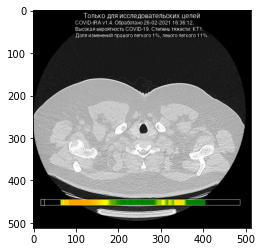

In [36]:
plt.imshow(jpeg.decode(jpeg.encode(dcm_rgb_jpeg.pixel_array)))

In [30]:
jpeg.decode(file_bytes[-246418:-9], pixel_format=11)

OSError: Unsupported JPEG process: SOF type 0xc3

In [31]:
dicom.pixel_array.shape

(512, 512)

In [33]:
import numpy as np

In [36]:
len(dicom.PixelData)

246426

In [46]:
jpeg.decode(dicom.PixelData)

OSError: Not a JPEG file: starts with 0xfe 0xff

In [ ]:
# color spaces
# see details in https://github.com/libjpeg-turbo/libjpeg-turbo/blob/master/turbojpeg.h
TJCS_RGB = 0
TJCS_YCbCr = 1
TJCS_GRAY = 2
TJCS_CMYK = 3
TJCS_YCCK = 4

# pixel formats
# see details in https://github.com/libjpeg-turbo/libjpeg-turbo/blob/master/turbojpeg.h
TJPF_RGB = 0
TJPF_BGR = 1
TJPF_RGBX = 2
TJPF_BGRX = 3
TJPF_XBGR = 4
TJPF_XRGB = 5
TJPF_GRAY = 6
TJPF_RGBA = 7
TJPF_BGRA = 8
TJPF_ABGR = 9
TJPF_ARGB = 10
TJPF_CMYK = 11

 TJPF_GRAY, TJSAMP_GRAY,

In [45]:
len(jpeg.encode(dicom.pixel_array), pixel_format=TJSAMP_GRAY)

ValueError: not enough values to unpack (expected 3, got 2)

In [64]:
np.tile(dicom.pixel_array, (3,1,1)).T.shape

(512, 512, 3)

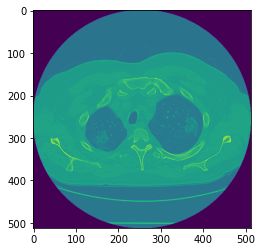

In [73]:
plt.imshow(dicom.pixel_array)

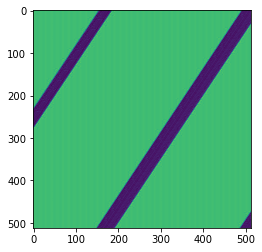

In [74]:
plt.imshow(jpeg.decode(jpeg.encode(np.tile(dicom.pixel_array, (3,1,1)).T), pixel_format=TJSAMP_GRAY)[..., 2])

In [23]:
decode_jpeg(file_bytes[-246418:-9])

ValueError: Unsupported JPEG process: SOF type 0xc3

# 4. 
- Сравнить цветные дайкомы пожатые с помощью dcmconv с непожатыми
- Пожать rgb изображение c помощью PIL

In [24]:
# import binascii
import PIL
import io


# Convert bytes to stream (file-like object in memory)
picture_stream = io.BytesIO(file_bytes[-246418:-9])

# Create Image object
picture = PIL.Image.open(picture_stream)

UnidentifiedImageError: cannot identify image file <_io.BytesIO object at 0x7f28ec9ea810>

In [25]:
picture_stream